# Avaliação final Numpy pandas 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Importando house sales

In [4]:
df_house_sales = pd.read_csv('kc_house_data.csv', parse_dates = [1])
df_house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_house_sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df_house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## EDA

### Avaliar correlação entre variaveis 

<AxesSubplot:>

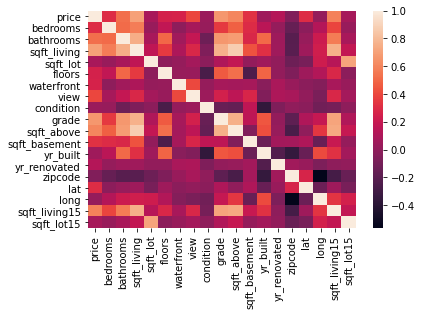

In [17]:
sns.heatmap(df_house_sales.iloc[:, 2:].corr())


### Densisdades de preços

<AxesSubplot:title={'center':'Densidade dos preços'}, xlabel='price', ylabel='Density'>

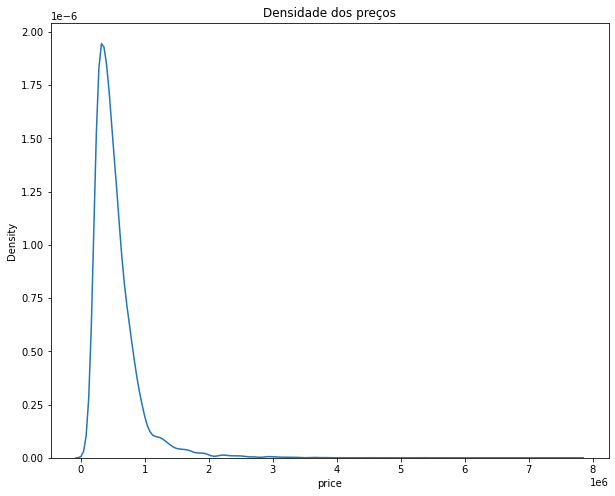

In [19]:
plt.figure(figsize=(10,8))
plt.title('Densidade dos preços')
sns.kdeplot(x = 'price', data=df_house_sales)

### Como é a distribuição de andares de uma casa nesse contexto

<AxesSubplot:ylabel='floors'>

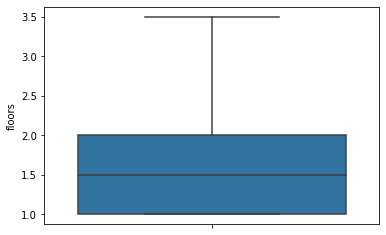

In [21]:
sns.boxplot(y = 'floors', data = df_house_sales)

### há uma relação entre o preço é a quantidade o tamanho do pé direito?

<AxesSubplot:title={'center':'Há uma relação entre o tamanho do pé direito é o preço?'}, xlabel='price', ylabel='sqft_living'>

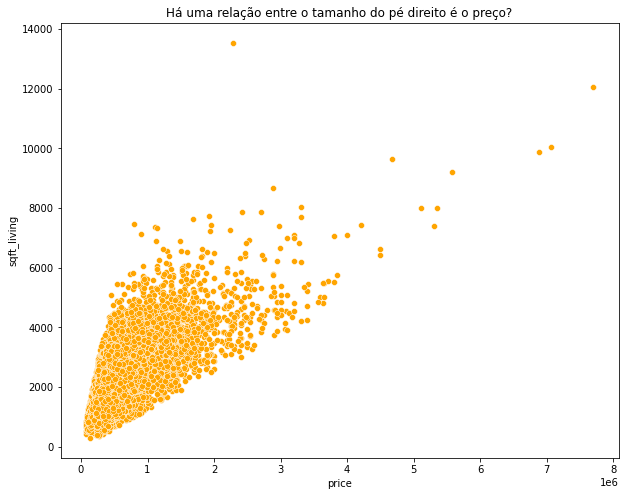

In [24]:
plt.figure(figsize=(10,8))
plt.title('Há uma relação entre o tamanho da casa é o preço?')
sns.scatterplot(x = 'price', y = 'sqft_living', data = df_house_sales, color = 'orange')

### há uma relação entre a quantidade de banherios e o preço?

<AxesSubplot:title={'center':'Há uma relação entre o tamanho da casa e a quantidade de banherios?'}, xlabel='price', ylabel='bathrooms'>

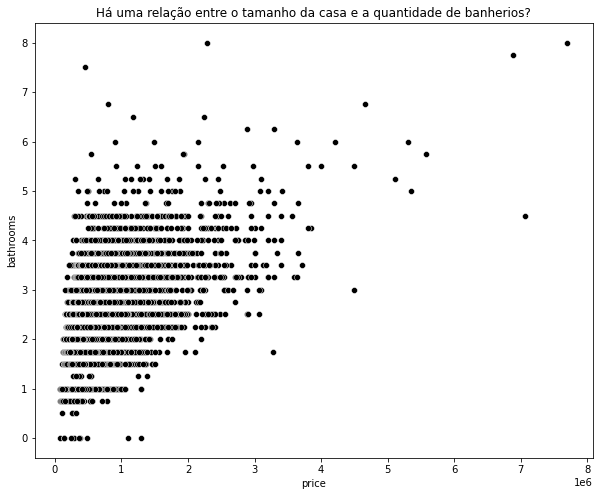

In [26]:
plt.figure(figsize=(10,8))
plt.title('Há uma relação entre o tamanho da casa e a quantidade de banherios?')
sns.scatterplot(x = 'price', y = 'bathrooms', data = df_house_sales, color = 'black')

podemos observar que há de fato uma relação mesmo que não tão forte

<AxesSubplot:title={'center':'Qual a maior faixa de preços de casas na amostra?'}, xlabel='price', ylabel='Count'>

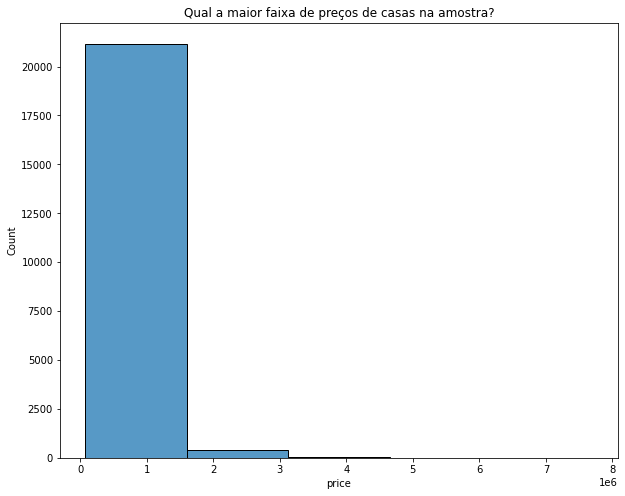

In [31]:

plt.figure(figsize = (10,8))
plt.title('Qual a maior faixa de preços de casas na amostra?')
sns.histplot(x = 'price', data = df_house_sales, bins = 5)

Podemos observar que atualmente possuimos mais casas na faixa 1 de valor, ou seja, entre 1 e 2 milhões